In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abhisirka2001","key":"6fc23e28ef79718a63cbab617d0de713"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          10643        321  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6020        181  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            926         46  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [ ]:
! kaggle competitions download -c 'ashrae-energy-prediction'

 97% 369M/379M [00:02<00:00, 109MB/s]
100% 379M/379M [00:02<00:00, 151MB/s]


In [ ]:
!unzip /content/ashrae-energy-prediction.zip

Archive:  /content/ashrae-energy-prediction.zip
  inflating: building_metadata.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: weather_test.csv        
  inflating: weather_train.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
train.shape

(20216100, 4)

In [ ]:
wt_train=pd.read_csv("/content/weather_train.csv")
wt_test=pd.read_csv("/content/weather_test.csv")

In [ ]:
bmd=pd.read_csv("/content/building_metadata.csv")


In [ ]:
wt_train.head(),wt_train.shape

(   site_id            timestamp  air_temperature  cloud_coverage  \
 0        0  2016-01-01 00:00:00             25.0             6.0   
 1        0  2016-01-01 01:00:00             24.4             NaN   
 2        0  2016-01-01 02:00:00             22.8             2.0   
 3        0  2016-01-01 03:00:00             21.1             2.0   
 4        0  2016-01-01 04:00:00             20.0             2.0   
 
    dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
 0             20.0                NaN              1019.7             0.0   
 1             21.1               -1.0              1020.2            70.0   
 2             21.1                0.0              1020.2             0.0   
 3             20.6                0.0              1020.1             0.0   
 4             20.0               -1.0              1020.0           250.0   
 
    wind_speed  
 0         0.0  
 1         1.5  
 2         0.0  
 3         0.0  
 4         2.6  , (139773, 9)

In [ ]:
bmd.head(),bmd.shape

(   site_id  building_id primary_use  square_feet  year_built  floor_count
 0        0            0   Education         7432      2008.0          NaN
 1        0            1   Education         2720      2004.0          NaN
 2        0            2   Education         5376      1991.0          NaN
 3        0            3   Education        23685      2002.0          NaN
 4        0            4   Education       116607      1975.0          NaN,
 (1449, 6))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [ ]:
wt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
bmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
## Function to reduce the DF size
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
reduce_memory_usage(bmd)
reduce_memory_usage(wt_train)
reduce_memory_usage(train)

reduce_memory_usage(wt_test)
reduce_memory_usage(test)

Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [ ]:
bmd.shape

(1449, 6)

In [ ]:
wt_train.shape

(139773, 9)

In [ ]:
wt_test.shape

(277243, 9)

In [ ]:
train.shape

(20216100, 4)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,799.278000,426.913309,0.0,393.000000,895.000000,1179.000000,1448.0
meter,20216100.0,0.662441,0.930992,0.0,0.000000,0.000000,1.000000,3.0
meter_reading,20216100.0,2117.121582,153235.625000,0.0,18.299999,78.775002,267.984009,21904700.0


In [ ]:
wt_train.describe().T

,count,mean,std,min,25%,50%,75%,max
site_id,139773.0,7.478977,4.604744,0.00000,3.000000,7.000000,11.000000,15.00000
air_temperature,139718.0,NaN,0.000000,-28.90625,7.199219,15.000000,22.203125,47.18750
cloud_coverage,70600.0,NaN,0.000000,0.00000,0.000000,2.000000,4.000000,9.00000
dew_temperature,139660.0,NaN,0.000000,-35.00000,0.600098,8.296875,14.398438,26.09375
precip_depth_1_hr,89484.0,NaN,NaN,-1.00000,0.000000,0.000000,0.000000,343.00000
sea_level_pressure,129155.0,NaN,NaN,968.00000,1012.000000,1016.500000,1021.000000,1046.00000
wind_direction,133505.0,NaN,NaN,0.00000,80.000000,190.000000,280.000000,360.00000
wind_speed,139469.0,NaN,0.000000,0.00000,2.099609,3.099609,5.000000,19.00000


In [ ]:
train.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [ ]:
wt_train.isna().sum()*100//139773

site_id                0
timestamp              0
air_temperature        0
cloud_coverage        49
dew_temperature        0
precip_depth_1_hr     35
sea_level_pressure     7
wind_direction         4
wind_speed             0
dtype: int64

In [ ]:
bmd.isna().sum().apply(lambda x:(x*100)//len(bmd))

site_id         0
building_id     0
primary_use     0
square_feet     0
year_built     53
floor_count    75
dtype: int64

In [ ]:
wt_test.isna().sum().apply(lambda x:(x*100//len(wt_test)))

site_id                0
timestamp              0
air_temperature        0
cloud_coverage        50
dew_temperature        0
precip_depth_1_hr     34
sea_level_pressure     7
wind_direction         4
wind_speed             0
dtype: int64

In [ ]:
bmd['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [ ]:
bmd['primary_use'].nunique()

16

In [ ]:
bmd.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')

In [ ]:
wt_train.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [ ]:
train.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')

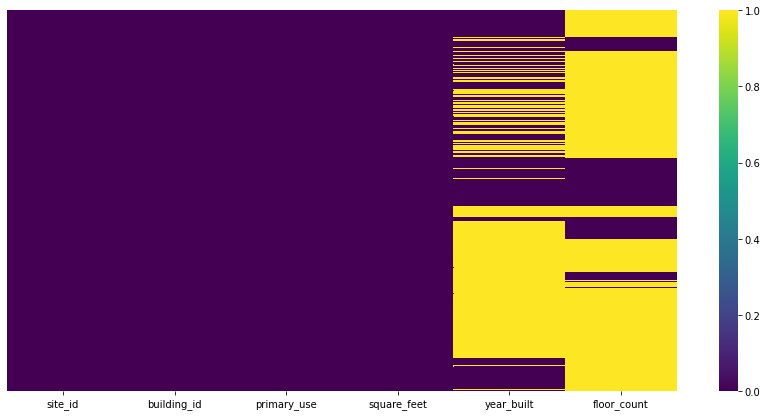

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(bmd.isnull(), yticklabels=False,cmap='viridis')

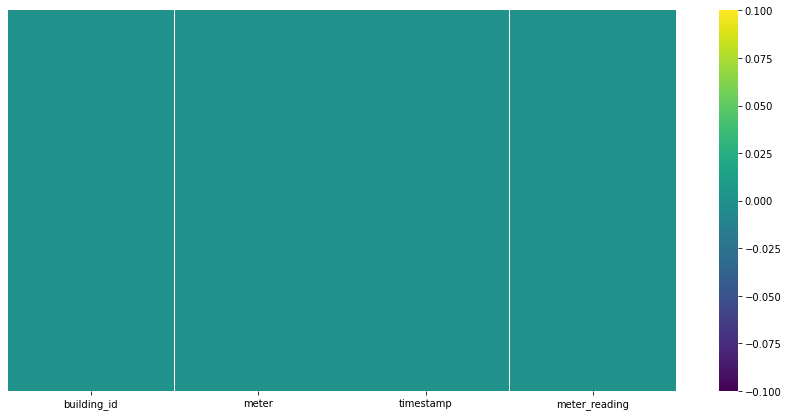

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train.isnull(), yticklabels=False,cmap='viridis')

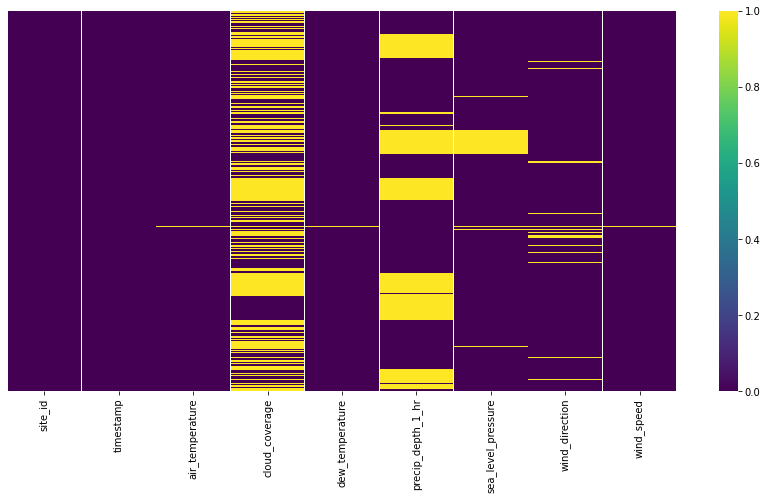

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(wt_train.isnull(), yticklabels=False,cmap='viridis')

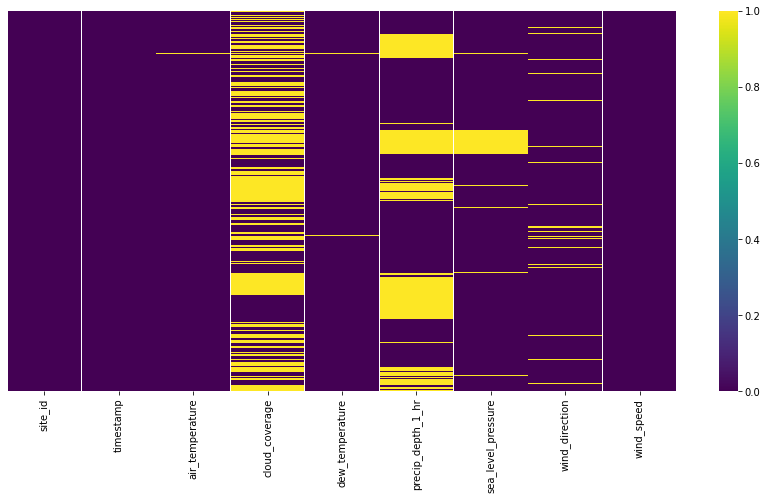

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(wt_test.isnull(), yticklabels=False,cmap='viridis')

In [ ]:
bmd.isna().sum()/len(bmd)*100

site_id         0.000000
building_id     0.000000
primary_use     0.000000
square_feet     0.000000
year_built     53.416149
floor_count    75.500345
dtype: float64

In [ ]:
len(bmd)

1449

In [ ]:
#pd.merge(df1, df2, on='employee')
BuildingTrainMerge=bmd.merge(train,left_on='building_id',right_on='building_id',how='left')
BuildingTrainMerge.shape
BuildingTrainMerge.to_csv("csv1.csv")

In [ ]:
BTW_train=BuildingTrainMerge.merge(wt_train,left_on=['site_id','timestamp'],right_on=['site_id','timestamp'],how='left')
BTW_train.shape

(20216100, 16)

In [ ]:
BTW_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site_id             int8   
 1   building_id         int16  
 2   primary_use         object 
 3   square_feet         int32  
 4   year_built          float16
 5   floor_count         float16
 6   meter               int8   
 7   timestamp           object 
 8   meter_reading       float32
 9   air_temperature     float16
 10  cloud_coverage      float16
 11  dew_temperature     float16
 12  precip_depth_1_hr   float16
 13  sea_level_pressure  float16
 14  wind_direction      float16
 15  wind_speed          float16
dtypes: float16(9), float32(1), int16(1), int32(1), int8(2), object(2)
memory usage: 1.0+ GB


In [ ]:
BuildingTrainMerge.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0


In [ ]:
BTW_train.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

In [ ]:
print("Percentage of missing values in the BTW_train dataset")
BTW_train.isna().sum()/len(BTW_train)*100

Percentage of missing values in the BTW_train dataset


site_id                0.000000
building_id            0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
dtype: float64

,sea_level_pressure
count,18984431.0
mean,NaN
std,NaN
min,968.0
25%,1011.5
50%,1016.0
75%,1020.5
max,1046.0


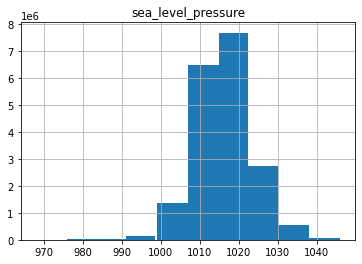

In [ ]:
BTW_train.hist('sea_level_pressure')
BTW_train[['sea_level_pressure']].describe()

,cloud_coverage
count,11390735.0
mean,NaN
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,4.0
max,9.0


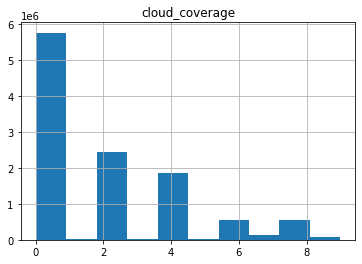

In [ ]:
BTW_train.hist('cloud_coverage')
BTW_train[['cloud_coverage']].describe()

,precip_depth_1_hr
count,16467077.0
mean,NaN
std,NaN
min,-1.0
25%,0.0
50%,0.0
75%,0.0
max,343.0


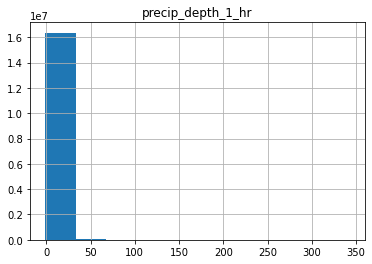

In [ ]:
BTW_train.hist('precip_depth_1_hr')
BTW_train[['precip_depth_1_hr']].describe()

,wind_speed
count,2.007242e+07
mean,NaN
std,0.000000e+00
min,0.000000e+00
25%,2.099609e+00
50%,3.099609e+00
75%,4.601562e+00
max,1.900000e+01


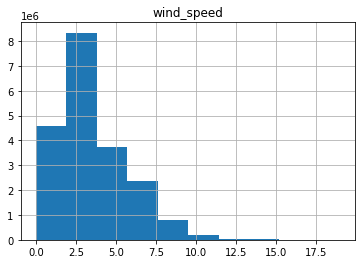

In [ ]:
BTW_train.hist('wind_speed')
BTW_train[['wind_speed']].describe()

,air_temperature
count,2.011944e+07
mean,NaN
std,0.000000e+00
min,-2.890625e+01
25%,8.601562e+00
50%,1.670312e+01
75%,2.409375e+01
max,4.718750e+01


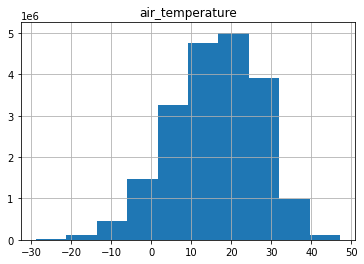

In [ ]:
BTW_train.hist(column='air_temperature')
BTW_train[['air_temperature']].describe()

In [ ]:
BTW_train["meter"].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

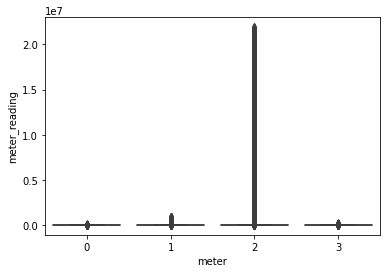

In [ ]:
sns.boxplot(x = 'meter', y = 'meter_reading', data = BTW_train)

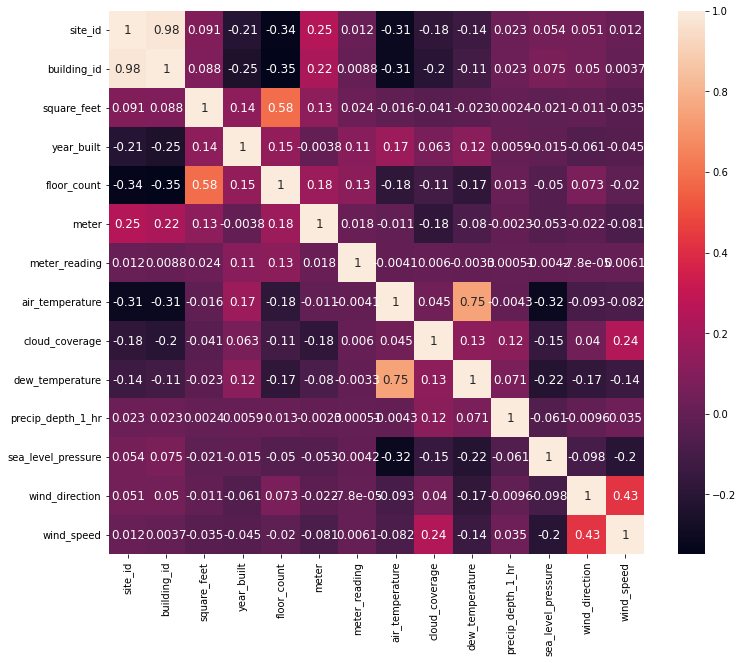

In [ ]:
corrmat=BTW_train.corr()
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size': 12})

[0, 1, 2, 3]

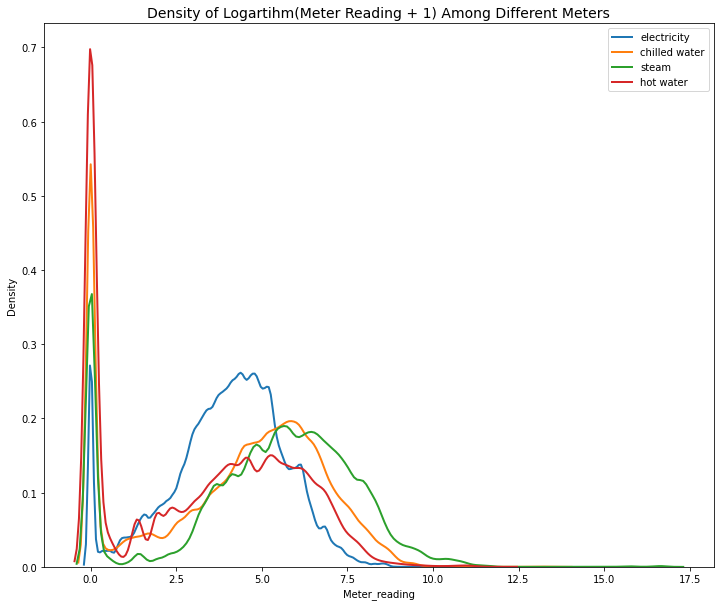

In [ ]:
# Distribution of the meter reading in meters without zeros
plt.figure(figsize=(12,10))

#list of different meters
meters = sorted(BTW_train['meter'].unique().tolist())

# plot meter_reading distribution for each meter
for meter_type in meters:
    subset = BTW_train[BTW_train['meter'] == meter_type]
    sns.kdeplot(np.log1p(subset["meter_reading"]), 
                label=meter_type, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Meter_reading")
plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
plt.title("Density of Logartihm(Meter Reading + 1) Among Different Meters", size=14)
meters

In [ ]:
BTW_train['wind_speed'] = BTW_train['wind_speed'].astype('float32')
BTW_train['air_temperature'] = BTW_train['air_temperature'].astype('float32')
BTW_train['precip_depth_1_hr'] = BTW_train['precip_depth_1_hr'].astype('float32')
BTW_train['cloud_coverage'] = BTW_train['cloud_coverage'].astype('float32')


In [ ]:
BTW_train['precip_depth_1_hr'].fillna(method='ffill', inplace = True)
BTW_train['cloud_coverage'].fillna(method='bfill', inplace = True)

BTW_train['wind_speed'].fillna(BTW_train['wind_speed'].mean(), inplace=True)

BTW_train['wind_direction'].fillna(BTW_train['wind_direction'].mean(), inplace=True)
BTW_train['air_temperature'].fillna(BTW_train['air_temperature'].mean(), inplace=True)
BTW_train.isnull().sum()

site_id                      0
building_id                  0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
meter                        0
timestamp                    0
meter_reading                0
air_temperature              0
cloud_coverage               3
dew_temperature         100140
precip_depth_1_hr            1
sea_level_pressure     1231669
wind_direction         1449048
wind_speed                   0
dtype: int64

In [ ]:
BTW_train.drop(["year_built","floor_count"],axis=1,inplace=True)

In [ ]:
print("Percentage of missing values in the BTW_train dataset")
BTW_train.isna().sum()/len(BTW_train)*100

Percentage of missing values in the BTW_train dataset


site_id               0.000000
building_id           0.000000
primary_use           0.000000
square_feet           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
air_temperature       0.000000
cloud_coverage        0.000015
dew_temperature       0.495348
precip_depth_1_hr     0.000005
sea_level_pressure    6.092515
wind_direction        7.167792
wind_speed            0.000000
dtype: float64

In [ ]:
BTW_train.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)

In [ ]:
BTW_train.isna().sum()/len(BTW_train)*100

site_id               0.0
building_id           0.0
primary_use           0.0
square_feet           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
dtype: float64

In [ ]:

BTW_train ['timestamp'] =  pd.to_datetime(BTW_train['timestamp'])
BTW_train['Month']=pd.DatetimeIndex(BTW_train['timestamp']).month
BTW_train['Day']=pd.DatetimeIndex(BTW_train['timestamp']).day


In [ ]:
BTW_train.head()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day,DayofWeek
1,0,0,Education,7432,0,2016-01-01 01:00:00,0.0,24.406250,2.0,21.09375,-1.0,1020.0,70.0,1.500000,1,1,4
2,0,0,Education,7432,0,2016-01-01 02:00:00,0.0,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000,1,1,4
3,0,0,Education,7432,0,2016-01-01 03:00:00,0.0,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000,1,1,4
4,0,0,Education,7432,0,2016-01-01 04:00:00,0.0,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609,1,1,4
6,0,0,Education,7432,0,2016-01-01 06:00:00,0.0,21.093750,6.0,21.09375,-1.0,1019.5,0.0,0.000000,1,1,4


In [ ]:
BTW_train["Month"].value_counts()

12    1541494
10    1536412
5     1518579
11    1508142
7     1491045
4     1490156
9     1489753
1     1484481
8     1457190
6     1433234
3     1407871
2     1326581
Name: Month, dtype: int64

In [ ]:
BTW_train["Day"].value_counts()

9     595861
27    591826
7     587502
26    586499
29    586226
1     584839
20    583646
22    582638
10    581721
28    581606
21    581048
19    581008
8     579985
23    579681
11    578240
2     577383
17    576969
24    576275
15    576214
16    576060
5     575710
14    574548
3     574482
18    574190
25    574133
6     573396
12    573260
4     571132
13    569807
30    536436
31    342617
Name: Day, dtype: int64

In [ ]:
BTW_train["DayofWeek"].value_counts()

5    2572240
4    2555643
1    2525034
3    2517136
6    2511497
0    2504084
2    2499304
Name: DayofWeek, dtype: int64

In [ ]:
BTW_train["primary_use"].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Services', 'Manufacturing/industrial'], dtype=object)

In [ ]:
BTW_train["primary_use"]=BTW_train["primary_use"].replace({'Education':1, 'Lodging/residential':2, 'Office':3,
       'Entertainment/public assembly':4, 'Other':5, 'Retail':6, 'Parking':7,
       'Public services':8, 'Warehouse/storage':9, 'Food sales and service':10,
       'Religious worship':11, 'Healthcare':12, 'Utility':13, 'Technology/science':14,
       'Services':15, 'Manufacturing/industrial':0})

In [ ]:
BTW_train.head()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day,DayofWeek
1,0,0,1,7432,0,2016-01-01 01:00:00,0.0,24.406250,2.0,21.09375,-1.0,1020.0,70.0,1.500000,1,1,4
2,0,0,1,7432,0,2016-01-01 02:00:00,0.0,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000,1,1,4
3,0,0,1,7432,0,2016-01-01 03:00:00,0.0,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000,1,1,4
4,0,0,1,7432,0,2016-01-01 04:00:00,0.0,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609,1,1,4
6,0,0,1,7432,0,2016-01-01 06:00:00,0.0,21.093750,6.0,21.09375,-1.0,1019.5,0.0,0.000000,1,1,4


In [ ]:
BTW_train["primary_use"]=BTW_train["primary_use"].astype("int32")

In [ ]:
BTW_train.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'meter',
       'timestamp', 'meter_reading', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'Month', 'Day', 'DayofWeek'],
      dtype='object')

In [ ]:
reduce_memory_usage(BTW_train)

Mem. usage decreased to 775.82 Mb (41.0% reduction)


,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day,DayofWeek
1,0,0,1,7432,0,2016-01-01 01:00:00,0.000,24.406250,2.0,21.093750,-1.0,1020.0,70.0,1.500000,1,1,4
2,0,0,1,7432,0,2016-01-01 02:00:00,0.000,22.796875,2.0,21.093750,0.0,1020.0,0.0,0.000000,1,1,4
3,0,0,1,7432,0,2016-01-01 03:00:00,0.000,21.093750,2.0,20.593750,0.0,1020.0,0.0,0.000000,1,1,4
4,0,0,1,7432,0,2016-01-01 04:00:00,0.000,20.000000,2.0,20.000000,-1.0,1020.0,250.0,2.599609,1,1,4
6,0,0,1,7432,0,2016-01-01 06:00:00,0.000,21.093750,6.0,21.093750,-1.0,1019.5,0.0,0.000000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216091,15,1448,3,92271,0,2016-12-31 15:00:00,2.575,-1.700195,4.0,-7.199219,-1.0,1012.5,160.0,6.699219,12,31,5
20216092,15,1448,3,92271,0,2016-12-31 16:00:00,2.975,-0.600098,0.0,-6.699219,-1.0,1011.0,170.0,7.199219,12,31,5
20216093,15,1448,3,92271,0,2016-12-31 17:00:00,3.975,2.199219,2.0,-7.800781,-1.0,1009.0,180.0,7.699219,12,31,5
20216094,15,1448,3,92271,0,2016-12-31 18:00:00,3.475,2.800781,2.0,-7.800781,-1.0,1007.5,180.0,8.203125,12,31,5


In [ ]:
BTW_train=BTW_train[0:868490]

In [ ]:
X =BTW_train[['building_id', 'primary_use', 'square_feet', 'meter', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'Month', 'Day', 'DayofWeek']]


# Create target variable
y = BTW_train['meter_reading']



In [ ]:
X.shape

(86849, 14)

In [ ]:
reduce_memory_usage(BTW_train)

Mem. usage decreased to  3.56 Mb (0.0% reduction)


,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day,DayofWeek
1,0,0,1,7432,0,2016-01-01 01:00:00,0.0,24.406250,2.0,21.093750,-1.0,1020.0,70.0,1.500000,1,1,4
2,0,0,1,7432,0,2016-01-01 02:00:00,0.0,22.796875,2.0,21.093750,0.0,1020.0,0.0,0.000000,1,1,4
3,0,0,1,7432,0,2016-01-01 03:00:00,0.0,21.093750,2.0,20.593750,0.0,1020.0,0.0,0.000000,1,1,4
4,0,0,1,7432,0,2016-01-01 04:00:00,0.0,20.000000,2.0,20.000000,-1.0,1020.0,250.0,2.599609,1,1,4
6,0,0,1,7432,0,2016-01-01 06:00:00,0.0,21.093750,6.0,21.093750,-1.0,1019.5,0.0,0.000000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90306,0,9,3,27000,0,2016-04-22 16:00:00,0.0,27.203125,6.0,16.093750,0.0,1018.0,170.0,6.199219,4,22,4
90307,0,9,3,27000,1,2016-04-22 16:00:00,1013.0,27.203125,6.0,16.093750,0.0,1018.0,170.0,6.199219,4,22,4
90308,0,9,3,27000,0,2016-04-22 17:00:00,0.0,28.296875,6.0,15.601562,0.0,1017.0,180.0,5.101562,4,22,4
90309,0,9,3,27000,1,2016-04-22 17:00:00,1055.0,28.296875,6.0,15.601562,0.0,1017.0,180.0,5.101562,4,22,4


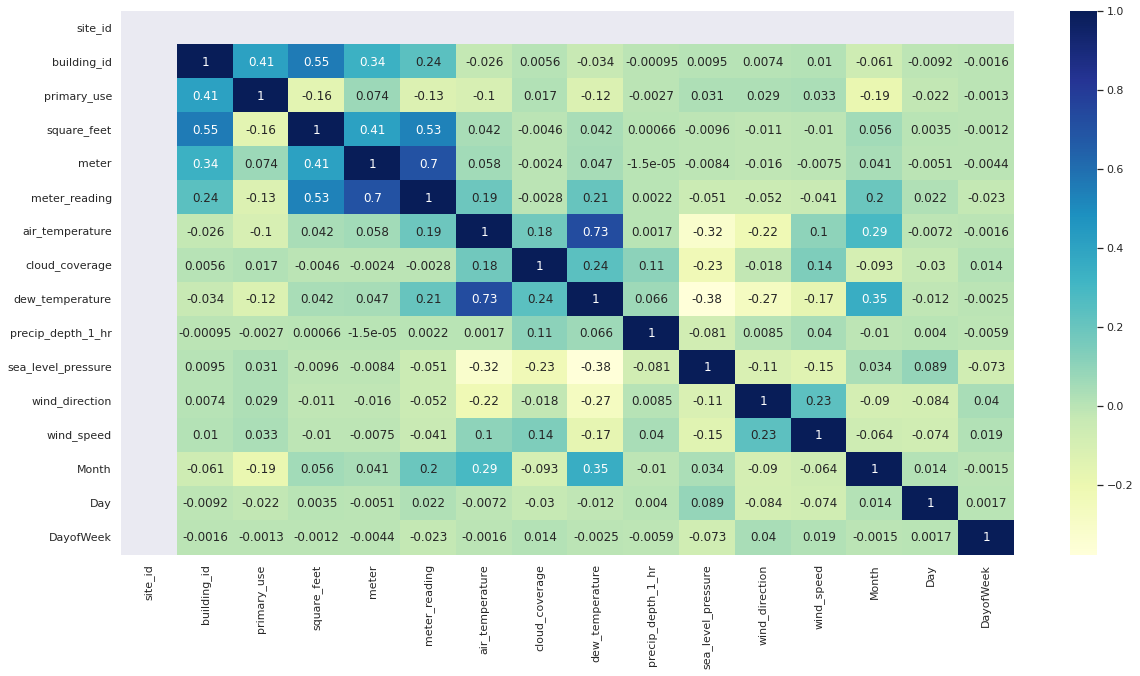

In [ ]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(BTW_train.corr(), cmap="YlGnBu", annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)


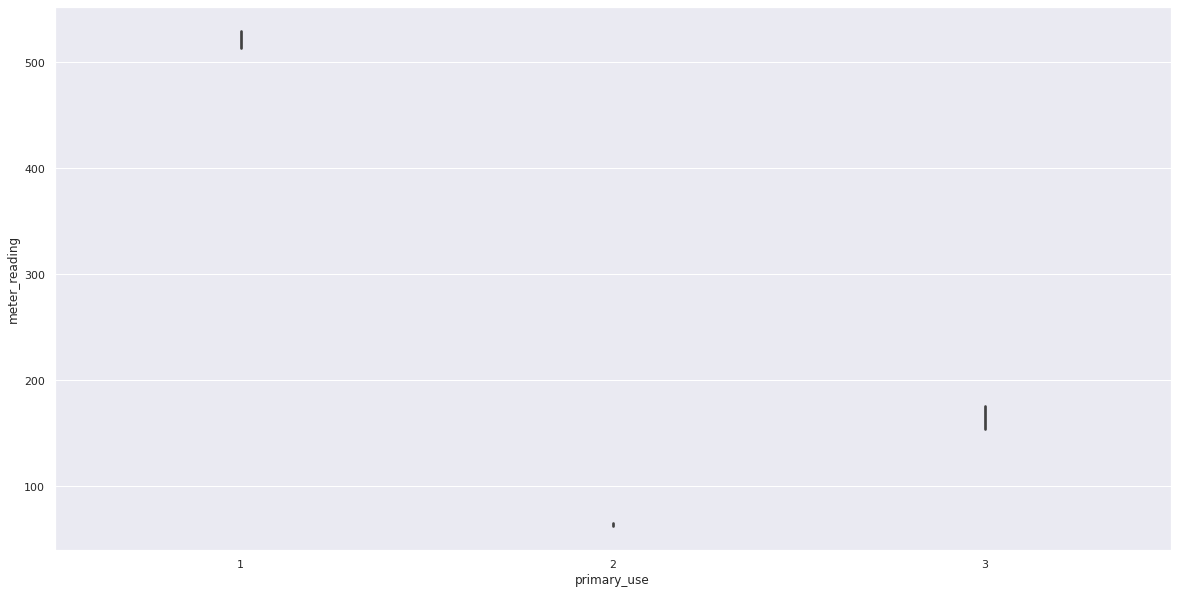

In [ ]:
sns.barplot(x=BTW_train["primary_use"], y=BTW_train["meter_reading"])

In [ ]:
import xgboost as xgb

dmatrix = xgb.DMatrix(data=X, label=y) #Learning API uses a dmatrix
params = {'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix, 
                    params=params, 
                    nfold=10, 
                    metrics={'rmse'})
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 387.12
